# <span style="color:green;">**Binomial Asset Pricing Model**</span>

### <span style="color:green;">1.1 Theory (in brief)</span>

We wanto to price an European call option written on $F = \left\{F(t,T); t \in \left[t_{0},T\right]\right\}$ with maturity (in years) $T$, strike price $K$. We have that, at each time step, the undelying asset can only move up with probability $q$ and down with probability $1-q$. When it moves up we have $F_{t_{i+1}} = uF_{t_{i}}$ and when it goes down we have $F_{t_{i+1}} = dF_{t_{i}}$. Assume that we are able to observe in the market the values $\sigma$, which is the volatility of log-returns of $S$, $r$ is the risk-free rate. We also have that at time $t_{0}=0$, $F(t_{0})$ is given. 

According to theory we can use the *binomial asset pricig model* to find the fail value of the call option $C(t_{0},K)$ at time $t_{0}$. Assume we have $N$ time steps on $\left[0,T\right]$ and set $\Delta t = \frac{T}{N}$. It can be shown that we must have $0<d<1+r<u$ in order to avoid arbitrage and:

\begin{equation*}
q = \frac{1 - d}{u -d},
\end{equation*}
so that discounted prices are martingales.

Furthermore we choose $u = e^{\sigma \sqrt{\Delta t}}$ in order to have a binomial three which produces an option price which converges to the one of the Black-Scholes model, which is given by:

\begin{equation*}
C(t_{0},K) = e^{-rT}\left(F(t_{0},T)\mathcal{N}(d_{1}) - K\mathcal{N}(d_{2})\right)
\end{equation*}
where:

\begin{align*}
d_{1} & = \frac{\log \frac{F(t_{0},T)}{K} + \frac{\sigma^{2}}{2}T}{\sigma \sqrt{T}}, \\
d_{2} & = d_{1} - \sigma \sqrt{T} 
\end{align*}
with
\begin{equation*}
\mathcal{N}(x) = \int_{-\infty}^{x}\frac{1}{\sqrt{2 \pi}}e^{-\frac{y^2}{2}}dy
\end{equation*}

Furthermore, in order to have a recombining three, we impose that: $u = \frac{1}{d}$. Hence $d = e^{-\sigma \sqrt{\Delta t}}$.

### <span style="color:green;">1.2 Python implementation of the binomial tree</span>

In [1]:
# Import the libraries yoy need
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt

def binomial_tree(F0: float, r: float, sigma: float, T:float, K:float, N:float):
    """
    This function copute the price of a European call option using the binomial tree method
    :param F0: initial fwd price
    :param r: risk-free interest rate
    :param sigma: volatility
    :param T: time to maturity
    :param K: strike price
    :param N: number of time steps
    """

    # Inizialization of the parameters
    C = np.zeros(N+1)
    dt = T/N
    
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u

    q = (1 - d)/(u-d)

    # Initialization of the option prices at maturity
    for i in range(N+1):
        C[i] = np.maximum(F0*u**(N-i)*d**i-K,0) # final leaves values

    # Backward recursion for the option price
    for j in range(N,0,-1):
        for i in range(0,j):
            C[i] = np.exp(-r*dt)*(q*C[i] + (1-q)*C[i+1])

    return C[0]

In [2]:
# Black76 exact formula
def black76_call(F: float, K: float, T: float, r: float, sigma: float):
    """
    This function copute the price of a European call option using the Black-Scholes formula
    :param F: initial fwd price
    :param K: strike price
    :param T: time to maturity
    :param r: risk-free interest rate
    :param sigma: volatility
    """

    d1 = (math.log(F / K) + (sigma**2) / 2 * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)

    # Black-Scholes formula for call price
    call_price = np.exp(-r*T)*(F * N_d1 - K * N_d2)
    return call_price


In [3]:
# Numerical check of the results

sigma = 0.2 # Volatility
r = 0.05    # Risk-free interest rate
T = 1       # Time to maturity
N = 252     # Number of time steps
K = 100     # Strike price
F0 = 100    # Initial stock price


exact_price = black76_call(F=F0, K=K, T=T, r=r, sigma=sigma)
binomial_price = binomial_tree(F0=F0, r=r, sigma=sigma, T=T, K=K, N=N)

print("Exact price: ", exact_price)
print("Binomial price: ", binomial_price)



Exact price:  7.57708214642728
Binomial price:  7.569568996940701


### <span style="color:green;">1.3 Convergence to exact solution</span>

Is it reasonable to expect that as the number of steps $N$ increases the option value obtained by the binomial asset pricing model converges to value obtained by the Black-Scholes formula? Yes, but this results is not intuitive and must be rigorously prooven. We check it numerically.

In [4]:
# FILL THE GAP: check what happens if the number of nodes N increase. Do you reach the convergence of the method?
# What is the order of convergence?

In [5]:
def binomial_pricer_error(F, K, T, r, sigma, N):
    exact_price = black76_call(F, K, T, r, sigma)
    binomial_price = binomial_tree(F, r, sigma, T, K, N)
    print("Exact price: ", exact_price)
    print("Binomial price: ", binomial_price)
    error = np.abs(binomial_price - exact_price)
    return error

In [6]:
nodes = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000]
sigma = 0.2 # Volatility
r = 0.04    # Risk-free interest rate
T = 2       # Time to maturity
N = 1000     # Number of time steps
K = 100     # Strike price
F0 = 100    # Initial stock price

errors_bt = np.zeros(len(nodes))

for i,N in enumerate(nodes):
    print (f"Number of nodes: {N:6d}")
    err = binomial_pricer_error(F=F0, K=K, T=T, r=r, sigma=sigma, N=N)
    errors_bt[i] = err

Number of nodes:      1
Exact price:  10.38163561387862
Binomial price:  12.968494990191738
Number of nodes:      2
Exact price:  10.38163561387862
Binomial price:  9.200515504987207
Number of nodes:      5
Exact price:  10.38163561387862
Binomial price:  10.903200533759893
Number of nodes:     10
Exact price:  10.38163561387862
Binomial price:  10.12573581914164
Number of nodes:     20
Exact price:  10.38163561387862
Binomial price:  10.252729509487237
Number of nodes:     50
Exact price:  10.38163561387862
Binomial price:  10.329861803846532
Number of nodes:    100
Exact price:  10.38163561387862
Binomial price:  10.355715059601199
Number of nodes:    200
Exact price:  10.38163561387862
Binomial price:  10.368667074938385
Number of nodes:    500
Exact price:  10.38163561387862
Binomial price:  10.37644623484407
Number of nodes:   1000
Exact price:  10.38163561387862
Binomial price:  10.379040598736507
Number of nodes:   2000
Exact price:  10.38163561387862
Binomial price:  10.3803380

Text(0.5, 1.0, 'Error with number of nodes')

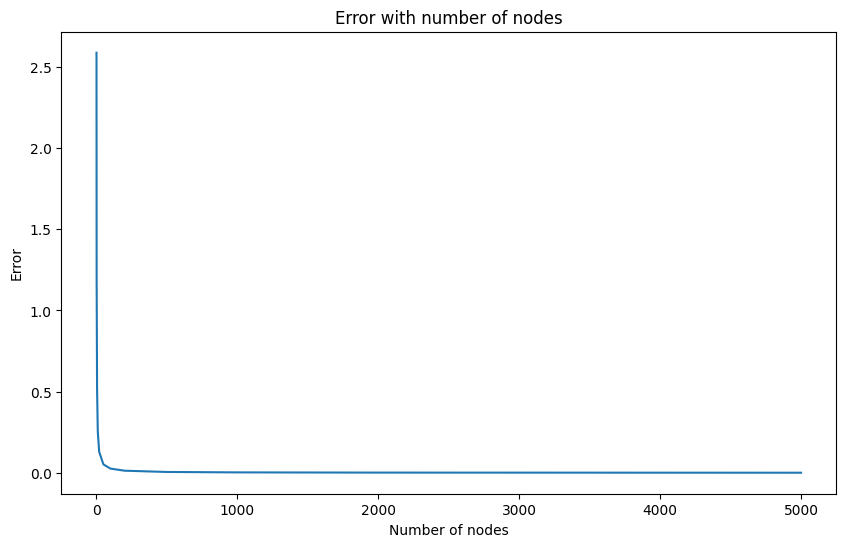

In [7]:
# Now plot the results
plt.figure(figsize=(10,6))
plt.plot(nodes,errors_bt.transpose())
plt.xlabel('Number of nodes')
plt.ylabel('Error')
plt.title('Error with number of nodes')

Text(0.5, 1.0, 'log Error with number of nodes')

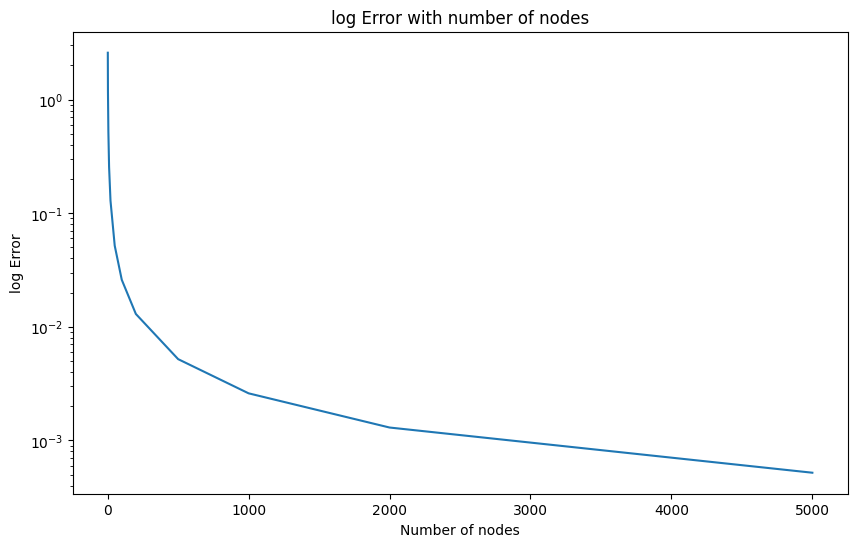

In [8]:
# Now plot the results
plt.figure(figsize=(10,6))
plt.plot(nodes,errors_bt.transpose())
plt.yscale('log')
plt.xlabel('Number of nodes')
plt.ylabel('log Error')
plt.title('log Error with number of nodes')

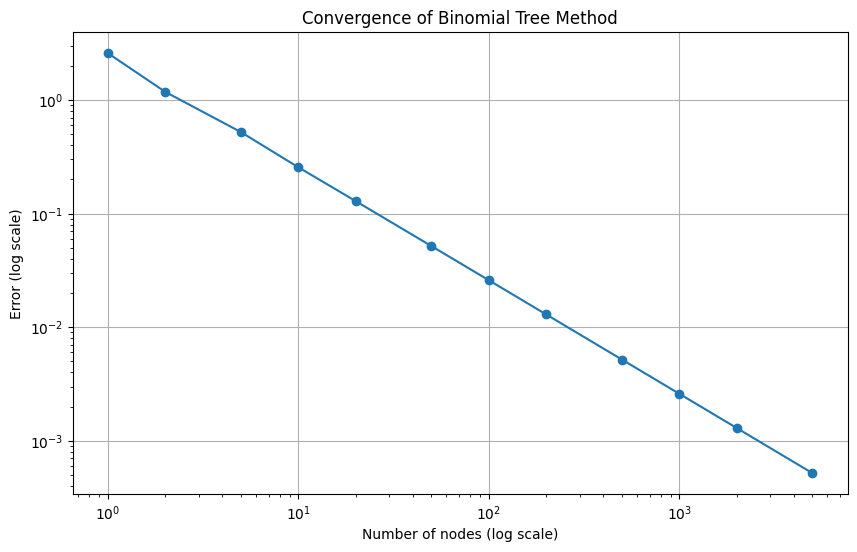

In [9]:
# Perform log-log plot
plt.figure(figsize=(10, 6))
plt.loglog(nodes, errors_bt, marker='o', linestyle='-')
plt.xlabel('Number of nodes (log scale)')
plt.ylabel('Error (log scale)')
plt.title('Convergence of Binomial Tree Method')
plt.grid(True)
plt.show()

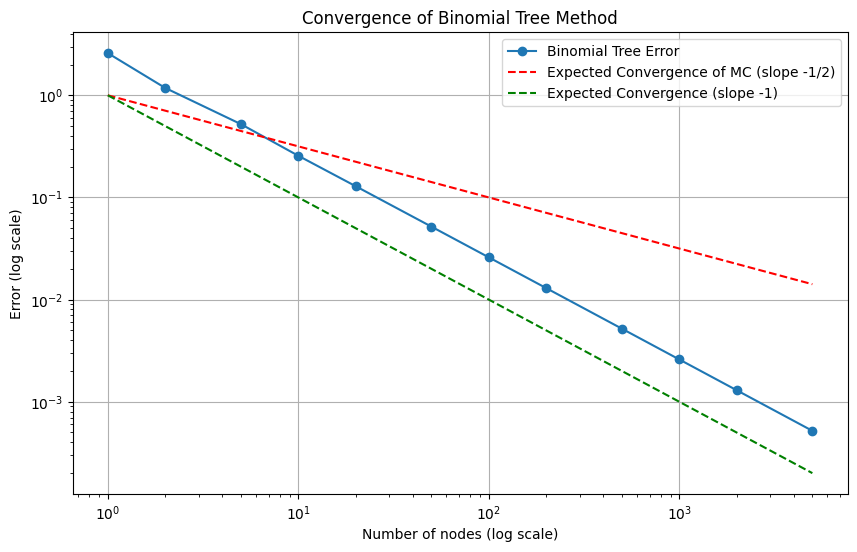

In [10]:
# Perform log-log plot
plt.figure(figsize=(10, 6))
plt.loglog(nodes, errors_bt, marker='o', linestyle='-', label='Binomial Tree Error')

# Plot the expected convergence line with slope -1/2
expected_errors = 1 / np.sqrt(nodes)
expected_bt_errors = 1 / np.abs(nodes)
plt.loglog(nodes, expected_errors, 'r--', label='Expected Convergence of MC (slope -1/2)')
plt.loglog(nodes, expected_bt_errors, 'g--', label='Expected Convergence (slope -1)')

plt.xlabel('Number of nodes (log scale)')
plt.ylabel('Error (log scale)')
plt.title('Convergence of Binomial Tree Method')
plt.grid(True)
plt.legend()
plt.show()

In [11]:
from scipy.stats import linregress
# Compute the slope of the log-log line
slope, intercept, _, _, _ = linregress(np.log(nodes), np.log(errors_bt))
print("Slope of log-log line:", slope)

Slope of log-log line: -0.9956691138802313
